In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder


In [ ]:
from pandas import read_csv
df=pd.read_csv('Dataset1_Preprocessed.csv')

In [ ]:
#Videogame Dataset
df = df.drop(['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)

In [ ]:
#Videogame Dataset
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Name'] = label_encoder.fit_transform(df['Name'])
df['Platform'] = label_encoder.fit_transform(df['Platform'])
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['country'] = label_encoder.fit_transform(df['country'])
df['store'] = label_encoder.fit_transform(df['store'])
df['product'] = label_encoder.fit_transform(df['product'])


In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df.drop('date', axis=1, inplace=True)

<ipython-input-4-addbcdcebaa6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
df=df.drop(['row_id'],axis=1)

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69855 entries, 0 to 69854
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  69855 non-null  int64  
 1   country     69855 non-null  float64
 2   store       69855 non-null  float64
 3   product     69855 non-null  float64
 4   num_sold    69855 non-null  float64
 5   Year        69855 non-null  float64
 6   Month       69855 non-null  float64
 7   Day         69855 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 4.3 MB


In [ ]:
df

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,0.323007,1.000000,0.806452,0.000000,0.854671,1.000000
1,0.323529,0.633333,0.548387,0.000000,0.854671,1.000000
2,0.255743,0.566667,0.677419,0.909091,0.238754,1.000000
3,0.811608,0.166667,0.322581,0.363636,0.621107,0.998028
4,0.684128,0.500000,0.225806,0.000000,0.937716,0.994083
...,...,...,...,...,...,...
15945,0.965976,0.200000,0.419355,0.363636,0.465398,0.000000
15946,0.504351,0.233333,0.451613,0.727273,0.416955,0.000000
15947,0.708667,0.533333,0.612903,0.545455,0.036332,0.000000
15948,0.436304,0.133333,0.677419,0.454545,0.013841,0.000000


In [ ]:
df["Day"].unique()

array([0.        , 0.46666667, 0.4       , 0.5       , 0.83333333,
       0.86666667, 0.93333333, 0.73333333, 0.8       , 0.96666667,
       0.6       , 0.63333333, 0.76666667, 0.66666667, 0.7       ,
       0.9       , 0.43333333, 1.        , 0.53333333, 0.56666667,
       0.03333333, 0.06666667, 0.1       , 0.13333333, 0.16666667,
       0.2       , 0.23333333, 0.26666667, 0.3       , 0.33333333,
       0.36666667,        nan])

In [ ]:
unique_values = df['Day'].nunique()

print(unique_values)


31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
 3   Year    913000 non-null  int64
 4   Month   913000 non-null  int64
 5   Day     913000 non-null  int64
dtypes: int64(6)
memory usage: 41.8 MB


In [ ]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

#Missing values KNN imputation (Data )

In [ ]:
#Video game dataset
from sklearn.impute import KNNImputer

df1=df.copy()

knn_imputer = KNNImputer(n_neighbors=3)

columns_for_knn = ['Year']

df1[columns_for_knn] = knn_imputer.fit_transform(df1[columns_for_knn])

df1

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,11007,26,2006.0,10,359,82.74
1,9327,11,1985.0,4,359,40.24
2,5573,26,2008.0,6,359,35.82
3,11009,26,2009.0,10,359,33.00
4,7346,5,1996.0,7,359,31.37
...,...,...,...,...,...,...
16593,11101,6,2002.0,4,269,0.01
16594,5796,7,2003.0,8,241,0.01
16595,8144,16,2008.0,6,21,0.01
16596,5014,4,2010.0,5,8,0.01


In [ ]:
df1.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

#Correlation

<Axes: >

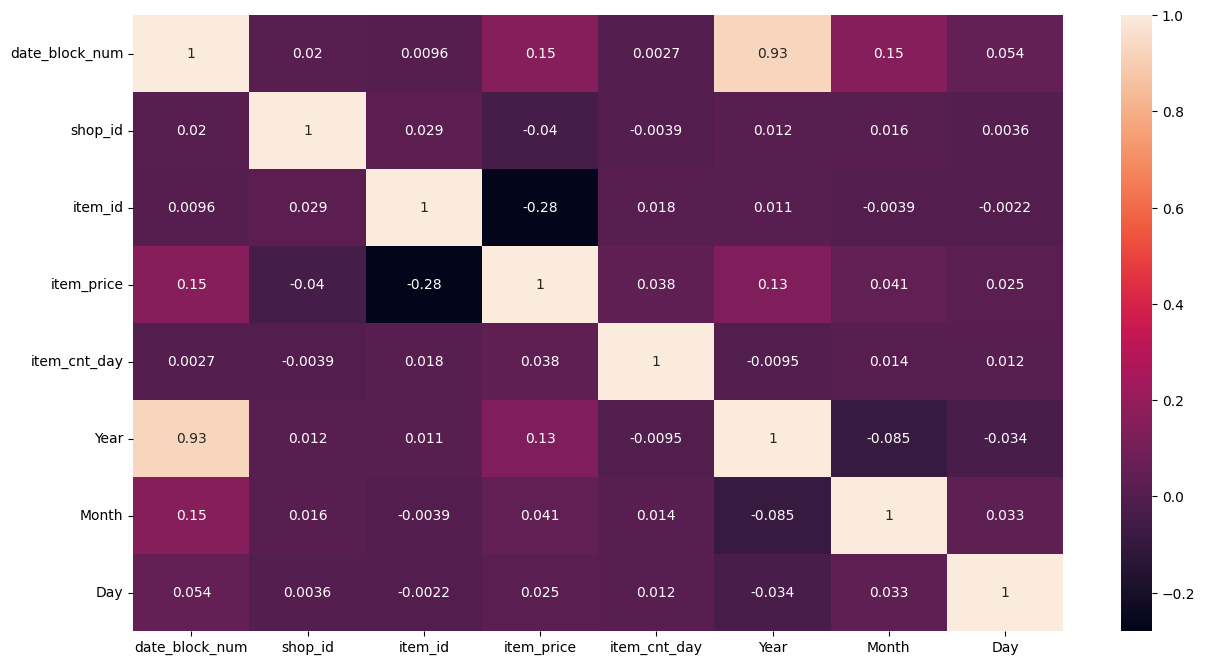

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,country,store,product,num_sold,Year,Month,Day
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000
mean,2.500000,0.500000,1.500000,194.296986,2018.501027,6.522930,15.729637
std,1.707837,0.500004,1.118042,126.893874,1.118348,3.448728,8.800155
min,0.000000,0.000000,0.000000,19.000000,2017.000000,1.000000,1.000000
25%,1.000000,0.000000,0.750000,95.000000,2018.000000,4.000000,8.000000
50%,2.500000,0.500000,1.500000,148.000000,2019.000000,7.000000,16.000000
75%,4.000000,1.000000,2.250000,283.000000,2020.000000,10.000000,23.000000
max,5.000000,1.000000,3.000000,986.000000,2020.000000,12.000000,31.000000


#Outlier Detection

Z-Score

In [ ]:
import pandas as pd
from scipy.stats import zscore

z_scores = df.apply(zscore)

average_z_scores = z_scores.mean()

print("Average Z-scores for each column:")
print(average_z_scores)


Average Z-scores for each column:
date_block_num    5.359355e-16
shop_id          -3.694238e-17
item_id           1.404507e-16
item_price       -3.604786e-16
item_cnt_day      3.286187e-17
Year             -1.264517e-13
Month            -9.107806e-17
Day              -5.986679e-17
dtype: float64


In [ ]:
def find_optimal_threshold(df, columns):
    thresholds = {}
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers_count = sum(z_scores > 3)  # Change the threshold here
        thresholds[column] = outliers_count
    return thresholds

columns_for_thresholds =['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'Year', 'Month', 'Day']

optimal_thresholds = find_optimal_threshold(df, columns_for_thresholds)

print("Number of outliers for each column at threshold=3:")
print(optimal_thresholds)

Number of outliers for each column at threshold=3:
{'date_block_num': 0, 'shop_id': 0, 'item_id': 0, 'item_price': 28701, 'item_cnt_day': 11939, 'Year': 0, 'Month': 0, 'Day': 0}


In [ ]:
def remove_outliers_zscore(df, columns):
    outliers = pd.DataFrame()
    threshold =3  # Change the threshold here
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers[column] = df[column][z_scores > threshold]
        df = df[z_scores <= threshold]

    return df

columns_for_outliers =['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'Year', 'Month', 'Day']

df_cleaned = remove_outliers_zscore(df, columns_for_outliers)

df_cleaned

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day
0,0,59,22154,999.00,1.0,2013,2,1
1,0,25,2552,899.00,1.0,2013,3,1
2,0,25,2552,899.00,-1.0,2013,5,1
3,0,25,2554,1709.05,1.0,2013,6,1
4,0,25,2555,1099.00,1.0,2013,1,15
...,...,...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,2015,10,10
2935845,33,25,7460,299.00,1.0,2015,9,10
2935846,33,25,7459,349.00,1.0,2015,10,14
2935847,33,25,7440,299.00,1.0,2015,10,22


#Standardizing

In [ ]:
df2=df_cleaned.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

data_standardized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

print(data_standardized)


         date_block_num  shop_id   item_id  item_price  item_cnt_day  \
0             -1.542651  1.60107  1.888818    0.302611     -0.243209   
1             -1.542651 -0.49404 -1.205011    0.179370     -0.243209   
2             -1.542651 -0.49404 -1.205011    0.179370     -3.282145   
3             -1.542651 -0.49404 -1.204695    1.177686     -0.243209   
4             -1.542651 -0.49404 -1.204537    0.425852     -0.243209   
...                 ...      ...       ...         ...           ...   
2895394        1.957080 -0.49404 -0.438419   -0.560078     -0.243209   
2895395        1.957080 -0.49404 -0.430370   -0.560078     -0.243209   
2895396        1.957080 -0.49404 -0.430528   -0.498458     -0.243209   
2895397        1.957080 -0.49404 -0.433526   -0.560078     -0.243209   
2895398        1.957080 -0.49404 -0.430370   -0.560078     -0.243209   

             Year     Month       Day  
0       -1.008941 -1.263472 -1.604933  
1       -1.008941 -0.978025 -1.604933  
2       -1.0089

In [ ]:
df2.isnull().sum()

date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
Year              0
Month             0
Day               0
dtype: int64

In [ ]:
df2

,Name,Platform,Year,Genre,Publisher,Global_Sales
197,3712,30,2014.0,0,494,5.08
198,3718,19,2006.0,0,494,5.08
199,2939,17,2010.0,10,138,5.08
200,9327,5,1999.0,4,359,5.07
201,7862,15,1996.0,0,542,5.05
...,...,...,...,...,...,...
16593,11101,6,2002.0,4,269,0.01
16594,5796,7,2003.0,8,241,0.01
16595,8144,16,2008.0,6,21,0.01
16596,5014,4,2010.0,5,8,0.01


In [ ]:
df2.describe()

,Name,Platform,Year,Genre,Publisher,Global_Sales
count,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000,16139.000000
mean,5801.946899,15.930045,2006.673586,4.935188,294.029928,0.527742
std,3321.741854,8.307310,5.301274,3.761727,177.331423,1.514764
min,0.000000,0.000000,1989.000000,0.000000,0.000000,0.010000
25%,2923.500000,7.000000,2003.000000,1.000000,138.000000,0.060000
50%,5856.000000,16.000000,2007.000000,5.000000,323.000000,0.170000
75%,8707.500000,21.000000,2010.000000,8.000000,456.000000,0.470000
max,11492.000000,30.000000,2020.000000,11.000000,578.000000,82.740000


#Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()

data_normalized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

print("\nNormalized Data:")
print(data_normalized)




Normalized Data:
         date_block_num   shop_id   item_id  item_price  item_cnt_day  Year  \
0                   0.0  1.000000  0.999323    0.164474      0.466667   0.0   
1                   0.0  0.423729  0.115116    0.148026      0.466667   0.0   
2                   0.0  0.423729  0.115116    0.148026      0.333333   0.0   
3                   0.0  0.423729  0.115206    0.281258      0.466667   0.0   
4                   0.0  0.423729  0.115251    0.180921      0.466667   0.0   
...                 ...       ...       ...         ...           ...   ...   
2895394             1.0  0.423729  0.334205    0.049342      0.466667   1.0   
2895395             1.0  0.423729  0.336506    0.049342      0.466667   1.0   
2895396             1.0  0.423729  0.336461    0.057566      0.466667   1.0   
2895397             1.0  0.423729  0.335604    0.049342      0.466667   1.0   
2895398             1.0  0.423729  0.336506    0.049342      0.466667   1.0   

            Month       Day  
0  

In [ ]:
data_normalized.to_csv('Dataset1_Preprocessed.csv')